8 9 8 9
7 8 7 8
9 8


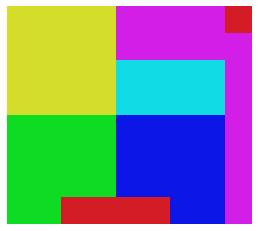

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 16 18
7 8 15 17
18 16


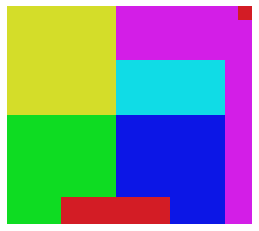

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 32 36
7 8 31 35
36 32


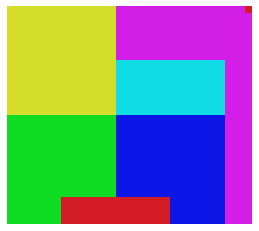

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 64 72
7 8 63 71
72 64


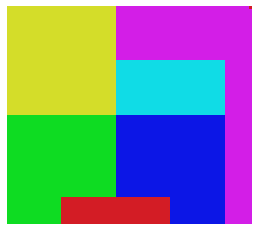

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 128 144
7 8 127 143
144 128


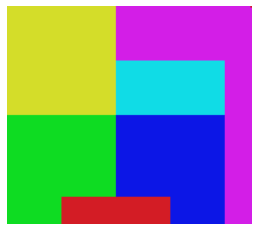

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 256 288
7 8 255 287
288 256


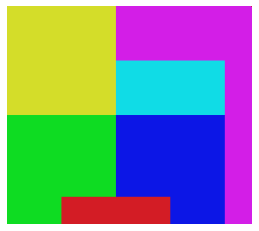

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 512 576
7 8 511 575
576 512


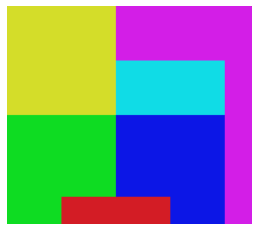

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 1024 1152
7 8 1023 1151
1152 1024


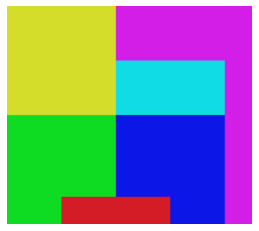

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 2048 2304
7 8 2047 2303
2304 2048


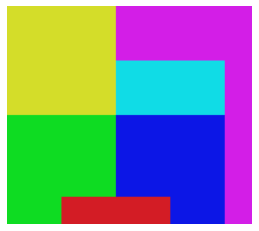

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 4096 4608
7 8 4095 4607
4608 4096


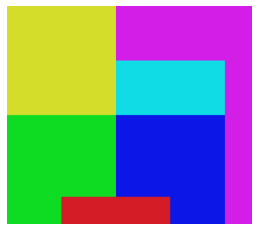

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 8192 9216
7 8 8191 9215
9216 8192


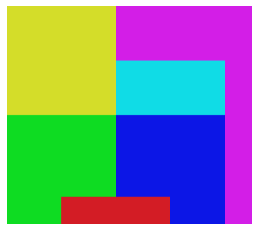

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)
8 9 256 288
7 8 255 287
288 256


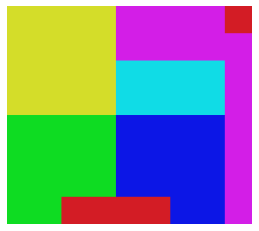

(210, 220, 30, 242) (210, 20, 30, 246)
(10, 220, 30, 250) (210, 20, 230, 244)


In [15]:
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

blue_12     = ( 10,  20, 230, 252)
green_10    = ( 10, 220,  30, 250)
cyan_8      = ( 10, 220, 230, 248)
red_6       = (210,  20,  30, 246)
magenta_4   = (210,  20, 230, 244)
yellow_2    = (210, 220,  30, 242)

blu = blue_12   
gre = green_10  
cya = cyan_8    
red = red_6     
mag = magenta_4 
yel = yellow_2  

cells = [
    [ yel, yel, yel, yel, mag, mag, mag, mag, red ],
    [ yel, yel, yel, yel, mag, mag, mag, mag, mag ],
    [ yel, yel, yel, yel, cya, cya, cya, cya, mag ],
    [ yel, yel, yel, yel, cya, cya, cya, cya, mag ],
    [ gre, gre, gre, gre, blu, blu, blu, blu, mag ],
    [ gre, gre, gre, gre, blu, blu, blu, blu, mag ],
    [ gre, gre, gre, gre, blu, blu, blu, blu, mag ],
    [ gre, gre, red, red, red, red, blu, blu, mag ]
]

def print_pixel_data(pythonList):
    titles = ["row", "col","r", "g", "b", "a"]
    header = "\t".join(titles)
    print(header)
    for rowIx, row in enumerate(pythonList):
        for colIx, pixel in enumerate(row):
            print(rowIx, colIx, *pixel, sep="\t")

def create_sample(size, isPreview=False):
    savefilename = "../sample-size-{}.png".format(size)
    previewfilename = "../doc/sample-preview.png"
    savefilename = previewfilename if isPreview else savefilename
    nbCellRows = len(cells)
    nbCellCols = len(cells[0])
    nbRows = size * nbCellRows 
    nbCols = size * nbCellCols 
    print(nbCellRows, nbCellCols, nbRows, nbCols)

    maxCellRow = nbCellRows - 1
    maxCellCol = nbCellCols - 1
    maxRow = nbRows - 1
    maxCol = nbCols - 1
    print(maxCellRow, maxCellCol, maxRow, maxCol)

    width = nbCols
    height = nbRows
    print(width, height)
    im = Image.new("RGBA", (width, height), (0,0,0,255))
    d = ImageDraw.Draw(im)

    #plt.imshow(im)
    #plt.show()


    def rowCol_to_XY(row, col):
        return {"X": col, "Y": row}

    def rowCol_to_XY_tuple(row, col):
        xy = rowCol_to_XY(row, col)
        return(xy["X"], xy["Y"])


    def fill_rectangle(cellRow, cellCol, colour=None):
        cellXY = rowCol_to_XY(cellRow, cellCol)
        rectX0 = size * cellXY["X"]
        rectY0 = size * cellXY["Y"]
        rectX1 = rectX0 + size
        rectY1 = rectY0 + size
        rectXY = [rectX0, rectY0, rectX1, rectY1]
        colour = cells[cellRow][cellCol] if colour is None else colour
        d.rectangle(rectXY, fill=colour, outline=colour, width=0)


    for cellRow in range(nbCellRows):
        for cellCol in range(nbCellCols):
            fill_rectangle(cellRow, cellCol)

    # Corner coordinates
    topLeftPixel = rowCol_to_XY_tuple(     0,      0)
    topRighPixel = rowCol_to_XY_tuple(     0, maxCol)
    botLeftPixel = rowCol_to_XY_tuple(maxRow,      0)
    botRighPixel = rowCol_to_XY_tuple(maxRow, maxCol)

    # Make top-right cell always 1x1 pixels
    lonePixelColour = cells[0][-1]
    surroundingColour = cells[0][-2]
    if savefilename != previewfilename:
        fill_rectangle(0, maxCellCol, surroundingColour)
        im.putpixel(topRighPixel, lonePixelColour)


    plt.axis("off")
    plt.imshow(im)
    plt.show()

    print(im.getpixel(topLeftPixel), im.getpixel(topRighPixel))
    print(im.getpixel(botLeftPixel), im.getpixel(botRighPixel))

    im.save(savefilename)

sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
for size in sizes:
    create_sample(size)
create_sample(32, isPreview=True)

In [63]:
im_1 = Image.open("sample-size-1.png")
im_4 = Image.open("sample-size-4.png")
im_16 = Image.open("sample-size-16.png")
im_256 = Image.open("sample-size-256.png")
im_1024 = Image.open("sample-size-1024.png")

In [67]:
def format_pixel(pixel):
    formattedChannels = map(lambda x: "{:>3}".format(x), pixel)
    joined = ", ".join(formattedChannels)
    enclosed = "(" + joined + ")"
    return enclosed
    
def print_corners(im, size):
    maxRow = im.height - 1
    maxCol = im.width - 1
    
    topLeftPixel = rowCol_to_XY_tuple(     0,      0)
    topRighPixel = rowCol_to_XY_tuple(     0, maxCol)
    botLeftPixel = rowCol_to_XY_tuple(maxRow,      0)
    botRighPixel = rowCol_to_XY_tuple(maxRow, maxCol)
    
    formatted_topLeft = format_pixel(im.getpixel(topLeftPixel))
    formatted_topRigh = format_pixel(im.getpixel(topRighPixel))
    formatted_botLeft = format_pixel(im.getpixel(botLeftPixel))
    formatted_botRigh = format_pixel(im.getpixel(botRighPixel))
    
    print("Size {}: (width = {}, height = {})".format(size, im.width, im.height))
    print(formatted_topLeft, formatted_topRigh)
    print(formatted_botLeft, formatted_botRigh)
    print()

print_corners(im_1, 1)
print_corners(im_4, 4)
print_corners(im_16, 16)
print_corners(im_256, 256)
print_corners(im_1024, 1024)

Size 1: (width = 9, height = 8)
(210, 220,  30, 242) (210,  20,  30, 246)
( 10, 220,  30, 250) (210,  20, 230, 244)

Size 4: (width = 36, height = 32)
(210, 220,  30, 242) (210,  20,  30, 246)
( 10, 220,  30, 250) (210,  20, 230, 244)

Size 16: (width = 144, height = 128)
(210, 220,  30, 242) (210,  20,  30, 246)
( 10, 220,  30, 250) (210,  20, 230, 244)

Size 256: (width = 2304, height = 2048)
(210, 220,  30, 242) (210,  20,  30, 246)
( 10, 220,  30, 250) (210,  20, 230, 244)

Size 1024: (width = 9216, height = 8192)
(210, 220,  30, 242) (210,  20,  30, 246)
( 10, 220,  30, 250) (210,  20, 230, 244)

